In [1]:
using CSV, Plots, Random, LinearAlgebra, Statistics, DataFrames, ARFIMA, GLM, RDatasets, XGBoost

In [2]:
using SparseArrays
include("proxgrad.jl")

proxgrad_const

In [3]:
sentiment = CSV.read("sentiment4.csv")

,Total_Sentiment,Avg_Sentiment,Vaccine,Death,Shut,Spread,Date,Death_Count_Day
,Float64,Float64,Int64,Int64,Int64,Int64,String,Int64
1,1.1162,0.0858615,0,0,0,0,02/11/20,0
2,-1.3723,-0.0980214,2,3,1,1,02/12/20,0
3,-1.3975,-0.0931667,0,3,0,0,02/13/20,0
4,0.0919,0.00919,0,1,2,1,02/14/20,0
5,0.0,0.0,1,0,0,0,02/15/20,0
6,-1.3986,-0.1998,0,0,1,0,02/16/20,0
7,-1.5258,-0.190725,1,0,0,0,02/17/20,0
8,-0.5147,-0.0343133,0,2,0,1,02/18/20,0
9,-1.1541,-0.144262,0,0,0,1,02/19/20,0


In [4]:
sentiment = [sentiment[1:6] sentiment[8]]

,Total_Sentiment,Avg_Sentiment,Vaccine,Death,Shut,Spread,x1
,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,1.1162,0.0858615,0,0,0,0,0
2,-1.3723,-0.0980214,2,3,1,1,0
3,-1.3975,-0.0931667,0,3,0,0,0
4,0.0919,0.00919,0,1,2,1,0
5,0.0,0.0,1,0,0,0,0
6,-1.3986,-0.1998,0,0,1,0,0
7,-1.5258,-0.190725,1,0,0,0,0
8,-0.5147,-0.0343133,0,2,0,1,0
9,-1.1541,-0.144262,0,0,0,1,0


In [5]:
function standarize(stock)
    return (stock .- mean(stock))/sqrt(var(stock))
end

standarize (generic function with 1 method)

In [6]:
sentiment[1] = standarize(sentiment[1])
sentiment[2] = standarize(sentiment[2])
sentiment[3] = standarize(sentiment[3])
sentiment[4] = standarize(sentiment[4])
sentiment[5] = standarize(sentiment[5])
sentiment[6] = standarize(sentiment[6])
sentiment[7] = standarize(sentiment[7]);

In [7]:
function MA(stock)
    ma = stock[1:4]
    for i in 5:length(stock)
        ma = vcat(ma, mean(stock[i-4:i]))
    end
    return ma
end

MA (generic function with 1 method)

In [8]:
sentiment

,Total_Sentiment,Avg_Sentiment,Vaccine,Death,Shut,Spread,x1
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.577592,1.88905,-0.88069,-1.30332,-1.14515,-1.09711,-1.44969
2,0.266832,-0.689646,-0.384181,-0.69086,-0.826446,-0.709807,-1.44969
3,0.263685,-0.621565,-0.88069,-0.69086,-1.14515,-1.09711,-1.44969
4,0.449679,0.813839,-0.88069,-1.09917,-0.507743,-0.709807,-1.44969
5,0.438203,0.684963,-0.632435,-1.30332,-1.14515,-1.09711,-1.44969
6,0.263547,-2.11694,-0.88069,-1.30332,-0.826446,-1.09711,-1.44969
7,0.247663,-1.98968,-0.632435,-1.30332,-1.14515,-1.09711,-1.44969
8,0.373928,0.203768,-0.88069,-0.895014,-1.14515,-0.709807,-1.44969
9,0.29408,-1.33811,-0.88069,-1.30332,-1.14515,-0.709807,-1.44969


In [9]:
Anthem = CSV.read("Anthem.csv",header = false)
Cardinal = CSV.read("Cardinal.csv",header = false)
Cigna = CSV.read("Cigna.csv",header = false)
CVS = CSV.read("CVS.csv",header = false)
Gilead = CSV.read("Gilead.csv",header = false)
McKesson = CSV.read("McKesson.csv",header = false)
Moderna = CSV.read("Moderna.csv",header = false)
Pfizer = CSV.read("Pfizer.csv",header = false)
United = CSV.read("United.csv",header = false)
Johnson = CSV.read("Johnson.csv",header = false);

thread = 1 warning: only found 8 / 9 columns around data row: 263. Filling remaining columns with `missing`


In [10]:
Cardinal[1] = standarize(Cardinal[1])
Cigna[1] = standarize(Cigna[1])
CVS[1] = standarize(CVS[1])
Gilead[1] = standarize(Gilead[1])
McKesson[1] = standarize(McKesson[1])
Moderna[1] = standarize(Moderna[1])
Pfizer[1] = standarize(Pfizer[1])
United[1] = standarize(United[1])
Johnson[1] = standarize(Johnson[1])
Anthem[1] = standarize(Anthem[1]);

In [11]:
CardinalMa = MA(Cardinal[1])
CignaMa = MA(Cigna[1])
CVSMa = MA(CVS[1])
GileadMa = MA(Gilead[1])
McKessonMa = MA(McKesson[1])
ModernaMa =MA(Moderna[1])
PfizerMa = MA(Pfizer[1])
UnitedMa = MA(United[1])
JohnsonMa = MA(Johnson[1])
AnthemMa = MA(Anthem[1]);

In [17]:
function abs_err(y,pred)
    return mean(abs.((y-pred)))
end

abs_err (generic function with 1 method)

In [18]:
function analysis(stock, sentiment)
    # index for 5-fold
    split = [43,43 + 44,43+ 44*2,43 + 44*3, 43 + 44*4,43 + 44*5]
    num_of_model = 3
    mse = zeros(num_of_model,5)
    w = zeros(18)
    for i in 1:5
        w_set = []
        # setting train and validation set
        split_cur = split[i]
        split2 = Int(round(split_cur*4/5))

        stock_train = stock[1][1:split2]
        stock_val = stock[1][split2 + 1:split_cur]

        sent_train = sentiment[1][1:split2]
        sent_val = sentiment[1][split2 + 1:split_cur]

        death_train = sentiment[3][1:split2]
        death_val = sentiment[3][split2 + 1:split_cur]

        vac_train = sentiment[2][1:split2]
        vac_val = sentiment[2][split2 + 1:split_cur]

        shut_train = sentiment[4][1:split2]
        shut_val = sentiment[4][split2 + 1:split_cur]

        #Naive Model, w[1:5]
        Xtrain = [sent_train death_train vac_train shut_train ones(length(sent_train))]
        Xval = [sent_val death_val vac_val shut_val ones(length(sent_val))]
        Ytrain = stock_train
        Yval = stock_val

        w_cur = Xtrain\Ytrain
        w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur
        mse[1,i] = abs_err(Yval,pred)

        #AR1 Model, w[6:11]
        Xtrain = [sent_train[2:end] stock_train[1:end-1] death_train[2:end] vac_train[2:end] shut_train[2:end] ones(length(sent_train)-1)]
        Xval = [sent_val[2:end] stock_val[1:end-1] death_val[2:end] vac_val[2:end] shut_val[2:end] ones(length(sent_val)-1)]
        Ytrain = stock_train[2:end]
        Yval = stock_val[2:end]

        w_cur = Xtrain\Ytrain
        w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur
        mse[2,i] = abs_err(Yval,pred)

        # AR2 Model, w[12:18]
        Xtrain = [sent_train[3:end] stock_train[2:end-1] stock_train[1:end-2] death_train[3:end] vac_train[3:end] shut_train[3:end] ones(length(sent_train)-2)]
        Xval = [sent_val[3:end] stock_val[2:end-1] stock_val[1:end-2] death_val[3:end] vac_val[3:end] shut_val[3:end] ones(length(sent_val)-2)]
        Ytrain = stock_train[3:end]
        Yval = stock_val[3:end]

        w_cur = Xtrain\Ytrain
        w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur
        mse[3,i] = abs_err(Yval,pred)
        w = hcat(w,w_set)
    end
    w = w[:,2:6]
    
    avg_mse = mean(mse, dims=2)
    
    final_model = findmin(avg_mse)[2][1]
    test_mse = zeros(5)
    model = ["model 1", "model 2", "model 3"]
    model_length = [5, 6, 7]
    fig = plot(linestyle = :dot, title = "Test predictions from 9/17 to 10/30")
    w_test = zeros(model_length[final_model])
    for i in 1:5
        #Fixed index
        stock_train = stock[1][1:split[i]]
        sent_train = sentiment[1][1:split[i]]
        death_train = sentiment[3][1:split[i]]
        vac_train = sentiment[2][1:split[i]]
        shut_train = sentiment[4][1:split[i]]

        stock_test = stock[1][split[i]+1:split[i+1]]
        sent_test = sentiment[1][split[i]+1:split[i+1]]
        death_test = sentiment[3][split[i]+1:split[i+1]]
        vac_test = sentiment[2][split[i]+1:split[i+1]]
        shut_test = sentiment[4][split[i]+1:split[i+1]]

        if final_model == 1
            Xtrain = [sent_train death_train vac_train shut_train ones(length(sent_train))]
            Xtest = [sent_test death_test vac_test shut_test ones(length(sent_test))]
            Ytrain = stock_train
            Ytest = stock_test

            w_cur = Xtrain\Ytrain
            w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred)
            #plot
            if i == 5
                date = [1:44]
                plot!(date, Ytest, color = :red,  label = "Actual Stock Price")
                plot!(date, pred, color = :blue, label = "Naive Model")
            end

        elseif final_model == 2
            Xtrain = [sent_train[2:end] stock_train[1:end-1] death_train[2:end] vac_train[2:end] shut_train[2:end] ones(length(stock_train)-1)]
            Xtest = [sent_test[2:end] stock_test[1:end-1] death_test[2:end] vac_test[2:end] shut_test[2:end] ones(length(stock_test)-1)]
            Ytrain = stock_train[2:end]
            Ytest = stock_test[2:end]

            w_cur = Xtrain\Ytrain
            w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred)
            #plot
            if i == 5
                date = [2:44]
                plot!(date, Ytest, color = :red,  label = "Actual Stock Price")
                plot!(date, pred, color = :blue, label = "AR1 Model")
            end

        elseif final_model == 3
            Xtrain = [sent_train[3:end] stock_train[2:end-1] stock_train[1:end-2] death_train[3:end] vac_train[3:end] shut_train[3:end] ones(length(sent_train)-2)]
            Xtest = [sent_test[3:end] stock_test[2:end-1] stock_test[1:end-2] death_test[3:end] vac_test[3:end] shut_test[3:end] ones(length(stock_test)-2)]
            Ytrain = stock_train[3:end]
            Ytest = stock_test[3:end]

            w_cur = Xtrain\Ytrain
            w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred) 
            #plot
            if i == 5
                date = [3:44]
                plot!(date, Ytest, color = :red, label = "Actual Stock Price")
                plot!(date, pred, color = :blue, label = "AR2 Model")
            end
        else
            print("error")
        end  
    end
    w_test = w_test[:,2:6]
    display(fig)
    print("Selected: ", model[final_model], ", estimated error is: ",mean(test_mse), ", Validation Error is :", findmin(avg_mse)[1])
end

analysis (generic function with 1 method)

In [19]:
function analysis1(stock, sentiment, stockMa)
    # index for 5-fold
    split = [43,43 + 44,43+ 44*2,43 + 44*3, 43 + 44*4,43 + 44*5]
    num_of_model = 2
    mse = zeros(4,5)
    w = zeros(36)
    for i in 1:5
        w_set = []
        position = 1
        # setting train and validation set
        split_cur = split[i]
        split2 = Int(round(split_cur*4/5))

        stock_train = stock[1][1:split2]
        stock_val = stock[1][split2 + 1:split_cur]
        
        stockMa_train = stockMa[1:split2]
        stockMa_val = stockMa[split2 + 1:split_cur]

        sent_train = sentiment[1][1:split2]
        sent_val = sentiment[1][split2 + 1:split_cur]

        death_train = sentiment[3][1:split2]
        death_val = sentiment[3][split2 + 1:split_cur]

        vac_train = sentiment[2][1:split2]
        vac_val = sentiment[2][split2 + 1:split_cur]

        shut_train = sentiment[4][1:split2]
        shut_val = sentiment[4][split2 + 1:split_cur]
        
        spred_train = sentiment[5][1:split2]
        spred_val = sentiment[5][split2 + 1:split_cur]
        
        death_train = sentiment[6][1:split2]
        death_val = sentiment[6][split2 + 1:split_cur]
        
        pos_train = sentiment[7][1:split2]
        pos_val = sentiment[7][split2 + 1:split_cur]

        #quad quad, w[1:9]
        Xtrain = [sent_train[2:end] stockMa_train[1:end-1] death_train[2:end] vac_train[2:end] shut_train[2:end] spred_train[2:end] death_train[2:end] pos_train[2:end] ones(length(sent_train)-1)]
        Xval = [sent_val[2:end] stockMa_val[1:end-1] death_val[2:end] vac_val[2:end] shut_val[2:end] spred_val[2:end] death_val[2:end] pos_val[2:end] ones(length(sent_val)-1)]
        Ytrain = stock_train[2:end]
        Yval = stock_val[2:end]
        
        n = length(Ytrain)
        loss = 1/n*QuadLoss()

            # we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
        λ = 0.1
        reg = λ*QuadReg()

        w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)
        w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur

        mse[1,i] = abs_err(Yval,pred)

        #quad one, w[10:18]
        loss = 1/n*QuadLoss()

        reg = λ*OneReg()

        w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)
        w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur

        mse[2,i] = abs_err(Yval,pred)
        
        #quantil quad, w[19:27]
        loss = 1/n*QuantileLoss(0.2)

        reg = λ*QuadReg()

        w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)
        w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur

        mse[3,i] = abs_err(Yval,pred)

        #huber quad, w[28:34]
        loss = 1/n*HuberLoss()

        reg = λ*QuadReg()

        w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)
        w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur

        mse[4,i] = abs_err(Yval,pred)
        
        w = hcat(w, w_set)
    end
    return w,mse
end

analysis1 (generic function with 1 method)

In [29]:
avg_mse = mean(mse, dims=2)
final_model = findmin(avg_mse)[2][1]

1

In [43]:
function analysis2(stock, sentiment, w, mse, stockMa)
    split = [43,43 + 44,43+ 44*2,43 + 44*3, 43 + 44*4,43 + 44*5]
    avg_mse = mean(mse, dims=2)
    models = ["Quad/Quad", "Quad/One", "Quantile/Quad", "Huber/Quad"]
    final_model = findmin(avg_mse)[2][1]
    test_mse = zeros(5)
    fig = plot(linestyle = :dot, title = "Test predictions from 9/17 to 10/30")
    w_test = zeros(9)
        
    for i in 1:5
        #Fixed index
        stock_train = stock[1][1:split[i]]
        stockMa_train = stockMa[1:split[i]]
        sent_train = sentiment[1][1:split[i]]
        death_train = sentiment[3][1:split[i]]
        vac_train = sentiment[2][1:split[i]]
        shut_train = sentiment[4][1:split[i]]
        spred_train = sentiment[5][1:split[i]]
        death_train = sentiment[6][1:split[i]]
        pos_train = sentiment[7][1:split[i]]
        

        stock_test = stock[1][split[i]+1:split[i+1]]
        stockMa_test = stockMa[split[i]+1:split[i+1]]
        sent_test = sentiment[1][split[i]+1:split[i+1]]
        death_test = sentiment[3][split[i]+1:split[i+1]]
        vac_test = sentiment[2][split[i]+1:split[i+1]]
        shut_test = sentiment[4][split[i]+1:split[i+1]]
        spred_test = sentiment[5][split[i]+1:split[i+1]]
        death_test = sentiment[6][split[i]+1:split[i+1]]
        pos_test = sentiment[7][split[i]+1:split[i+1]]
        
        Xtrain = [sent_train[2:end] stockMa_train[1:end-1] death_train[2:end] vac_train[2:end] shut_train[2:end] spred_train[2:end] death_train[2:end] pos_train[2:end] ones(length(stock_train)-1)]
        Xtest = [sent_test[2:end] stockMa_test[1:end-1] death_test[2:end] vac_test[2:end] shut_test[2:end] spred_test[2:end] death_test[2:end] pos_test[2:end] ones(length(stock_test)-1)]
        Ytrain = stock_train[2:end]
        Ytest = stock_test[2:end]
        
        n = length(Ytrain)
        λ = 0.1

        if final_model == 1
            loss = 1/n*QuadLoss()
            # we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
            reg = λ*QuadReg()

            w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)
            w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred)
            if i == 5
                date = [1:43]
                plot!(date, Ytest, color = :red,  label = "Actual Stock Price")
                plot!(date, pred, color = :blue, label = "AR1 Model")
            end

        elseif final_model == 2
            loss = 1/n*QuadLoss()

            # we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
            reg = λ*OneReg()

            w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)
            w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred)
            if i == 5
                date = [1:43]
                plot!(date, Ytest, color = :red,  label = "Actual Stock Price")
                plot!(date, pred, color = :blue, label = "AR1 Model")
            end
        elseif final_model == 3
            # we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
            reg = λ*QuadReg()
            loss = 1/n*QuantileLoss(0.2)
            w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)
            w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred)
            if i == 5
                date = [1:43]
                plot!(date, Ytest, color = :red,  label = "Actual Stock Price")
                plot!(date, pred, color = :blue, label = "AR1 Model")
            end
        else
            reg = λ*QuadReg()
            loss = 1/n*HuberLoss()
            w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)
            w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred)
            if i == 5
                date = [1:43]
                plot!(date, Ytest, color = :red,  label = "Actual Stock Price")
                plot!(date, pred, color = :blue, label = "AR1 Model")
            end
        end
    end
    w_test = w_test[:,2:6]
    print("Selected: ", models[final_model], ", estimated error is: ",mean(test_mse), ", Validation Error is :", findmin(avg_mse)[1])
    display(fig)
    return w_test
end

analysis2 (generic function with 1 method)

In [55]:
mean(w1, dims=2)

9×1 Array{Float64,2}:
  0.055487355829501095
  0.7358167328334253
 -0.11696247257168224
 -0.13069412042737766
  0.03699551431374767
 -0.036389429662785196
 -0.11696247257168224
  0.1325345826340264
  0.00873187055398961

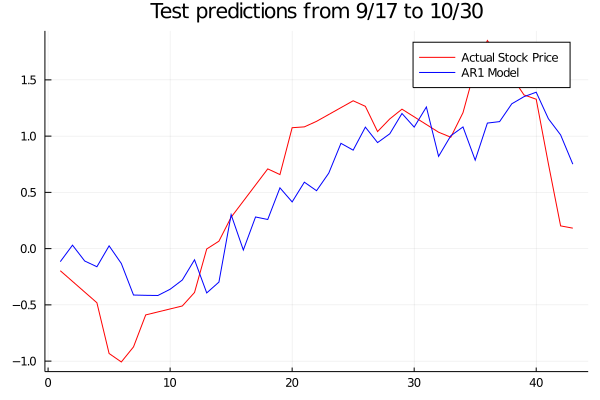

Selected: Quad/Quad, estimated error is: 0.34261896709750594, Validation Error is :0.5303593404686049

9×5 Array{Float64,2}:
 -0.0270897   0.0873087    0.0602212   0.07492      0.0820766
  0.785031    0.714668     0.713236    0.725933     0.740215
 -0.190919   -0.143869    -0.106126   -0.0854918   -0.0584067
 -0.139004   -0.157646    -0.146463   -0.119264    -0.0910944
 -0.0342288   0.0567156    0.0446967   0.0615061    0.056288
 -0.036571   -0.00226985  -0.0406056  -0.0548244   -0.0476763
 -0.190919   -0.143869    -0.106126   -0.0854918   -0.0584067
  0.146233    0.17449      0.159764    0.100804     0.0813806
 -0.101586    0.086442     0.0681215   0.00169954  -0.0110172

In [54]:
w,mse = analysis1(Anthem, sentiment, AnthemMa)
w1 = analysis2(Anthem, sentiment, w, mse, AnthemMa);w1

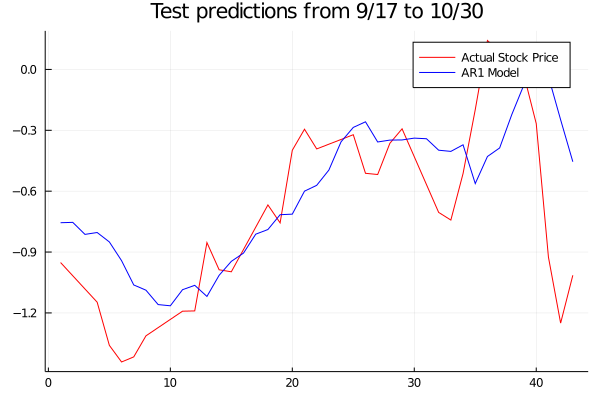

Selected: Quad/One, estimated error is: 0.31472463242536675, Validation Error is :0.38953971976568635

9×5 Array{Float64,2}:
  0.0          0.0         0.0         0.0         0.0
  0.839559     0.810386    0.837301    0.837444    0.850526
 -0.117367    -0.0872527  -0.0616785  -0.0423456  -0.0198741
 -0.170115    -0.0796196  -0.0680262  -0.0256007   0.0
  0.00697428   0.0933652   0.0816245   0.0591656   0.0517135
 -0.0573441    0.0         0.0         0.0         0.0
 -0.117367    -0.0872527  -0.0616785  -0.0423456  -0.0198741
  0.177015     0.010349    0.0         0.0         0.0
  0.0          0.0         0.0         0.0         0.0

In [56]:
w,mse = analysis1(Cigna, sentiment,CignaMa)
w2 = analysis2(Cigna, sentiment, w, mse, CignaMa);w2

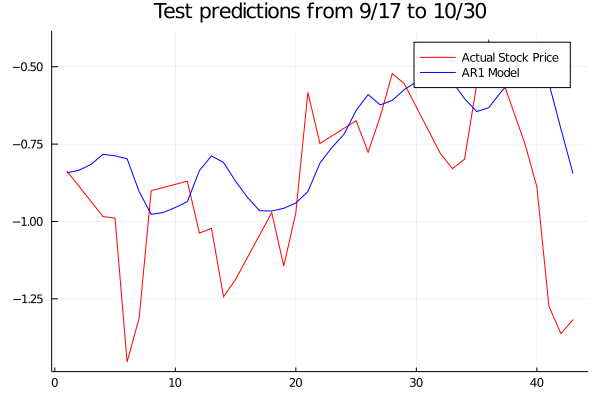

Selected: Quad/One, estimated error is: 0.3215993291342864, Validation Error is :0.35119577561745974

9×5 Array{Float64,2}:
 -0.0678847   0.0          0.0          0.0         0.0
  1.00754     0.863589     0.844803     0.877606    0.860908
  0.0        -0.0106759   -0.0127808    0.0         0.0
 -0.122228   -0.0905423   -0.0638006   -0.0124152   0.0
  0.0         0.00538799   0.00206516   0.0102199   0.0
  0.0         0.0         -0.00625818  -0.00413292  0.0
  0.0        -0.0106759   -0.0127808    0.0         0.0
  0.218904    0.0789575    0.041547     0.0375099   0.0
  0.0         0.0          0.0          0.0         0.0

In [57]:
w,mse = analysis1(Cardinal, sentiment,CardinalMa)
w3 = analysis2(Cardinal, sentiment, w, mse, CardinalMa);w3

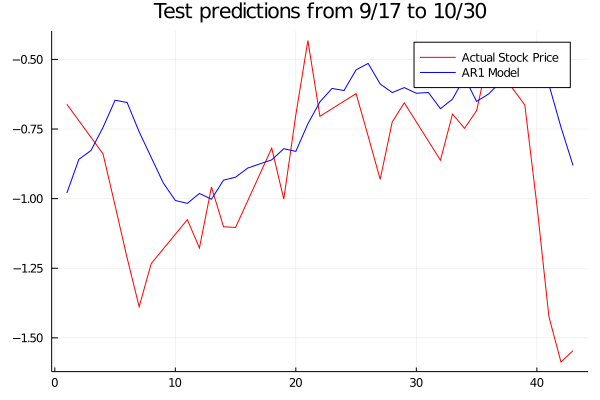

Selected: Quad/One, estimated error is: 0.2986479839613761, Validation Error is :0.3232445243230085

9×5 Array{Float64,2}:
  0.0         0.0         0.0         0.0         0.0
  0.830679    0.772562    0.792635    0.782812    0.833244
 -0.0102148  -0.0373184  -0.0259237  -0.0196943  -0.000391534
 -0.238414   -0.129346   -0.0788373  -0.0302084   0.0
  0.0         0.0310856   0.0431319   0.0146541   0.0159272
 -0.127909   -0.0512327  -0.0629323  -0.0535969  -0.0201666
 -0.0102148  -0.0373184  -0.0259237  -0.0196943  -0.000391534
  0.205519    0.0789612   0.04556     0.0209185   0.0
  0.0         0.0         0.0         0.0         0.0

In [58]:
w,mse = analysis1(CVS, sentiment,CVSMa)
w4 = analysis2(CVS, sentiment, w, mse, CVSMa);w4

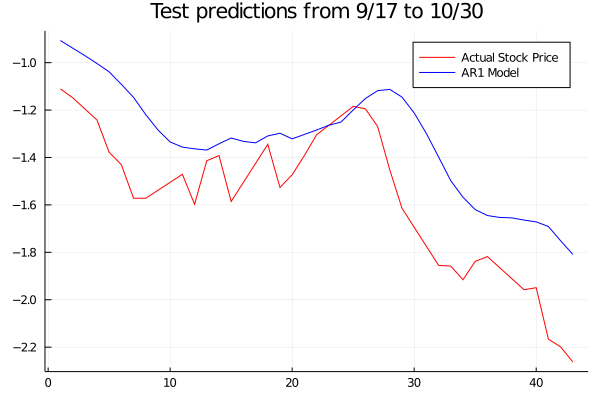

Selected: Quad/One, estimated error is: 0.29582461884345035, Validation Error is :0.3359907766564488

9×5 Array{Float64,2}:
 -0.160401    -0.0577322  -0.0359399  -0.0138055    0.0
  0.528121     0.737903    0.725442    0.745714     0.849953
  3.84464e-5   0.0         0.0         0.0          0.0
 -0.0340722   -0.0246092  -0.0150417   0.0          0.0
  0.0211447    0.0320572   0.0234548   0.00977918   0.0
 -0.0334709    0.0         0.0         0.0          0.0
  3.84464e-5   0.0         0.0         0.0          0.0
 -0.0255813    0.0         0.0         0.0         -0.0493083
  0.0          0.0901306   0.112952    0.105161     0.0

In [59]:
w,mse = analysis1(Gilead, sentiment,GileadMa)
w5 = analysis2(Gilead, sentiment, w, mse, GileadMa);w5

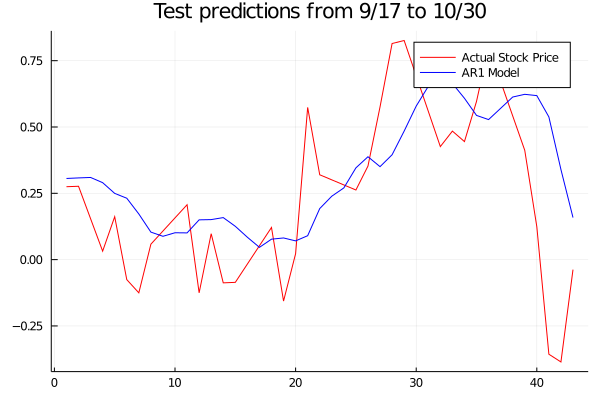

Selected: Quad/One, estimated error is: 0.2859696826499727, Validation Error is :0.3545684119932477

9×5 Array{Float64,2}:
 -0.167756   0.0          0.0         0.0          0.0
  1.01095    0.886853     0.861041    0.867254     0.860027
  0.0       -0.00364861  -0.0167722   0.0          0.0
 -0.148592  -0.0859033   -0.0333699  -0.000887369  0.0
  0.0        0.0          0.0         0.0          0.0
  0.0        0.0          0.0        -0.00219948   0.0
  0.0       -0.00364861  -0.0167722   0.0          0.0
  0.215936   0.128868     0.0938778   0.0817285    0.0640388
  0.0        0.0          0.0         0.0          0.0

In [60]:
w,mse = analysis1(McKesson, sentiment,McKessonMa)
w6 = analysis2(McKesson, sentiment, w, mse, McKessonMa);w6

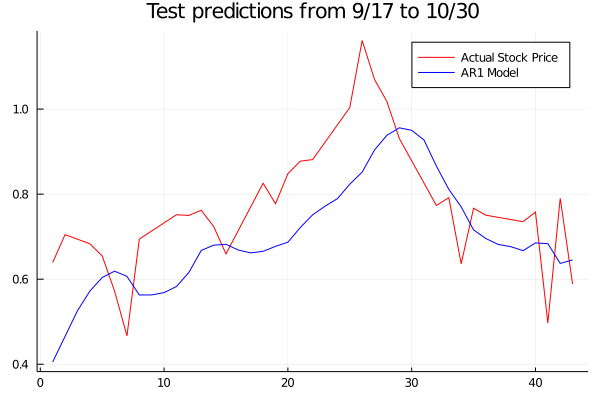

Selected: Quad/One, estimated error is: 0.15657012804437734, Validation Error is :0.14498596279335357

9×5 Array{Float64,2}:
 0.0       0.0       0.0      0.0       0.0
 0.966513  0.939437  0.92536  0.927595  0.916545
 0.0       0.0       0.0      0.0       0.0
 0.0       0.0       0.0      0.0       0.0
 0.0       0.0       0.0      0.0       0.0
 0.0       0.0       0.0      0.0       0.0
 0.0       0.0       0.0      0.0       0.0
 0.0       0.0       0.0      0.0       0.0
 0.0       0.0       0.0      0.0       0.0

In [61]:
w,mse = analysis1(Moderna, sentiment,ModernaMa)
w7 = analysis2(Moderna, sentiment, w, mse, ModernaMa);w7

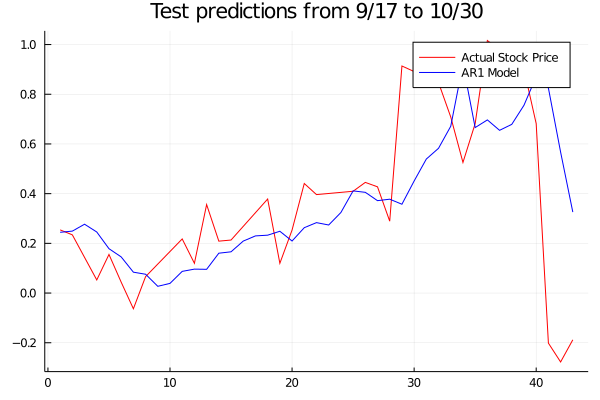

Selected: Quad/One, estimated error is: 0.26201081962768213, Validation Error is :0.3524597143621306

9×5 Array{Float64,2}:
 -0.241453   -0.061673    -0.0682113  -0.00210501  0.0
  0.956743    0.929042     0.940545    0.922389    0.917177
 -0.0265348  -0.00208908   0.0         0.0         0.0
 -0.0702803  -0.0700041    0.0         0.0         0.0
  0.0         0.0701916    0.0681795   0.0751648   0.0564138
 -0.0835961   0.0          0.0         0.0         0.0
 -0.0265348  -0.00208908   0.0         0.0         0.0
  0.192528    0.0779472    0.0         0.0302      0.015676
  0.0         0.0         -0.0498219   0.0         0.0

In [62]:
w,mse = analysis1(Pfizer, sentiment,PfizerMa)
w8 = analysis2(Pfizer, sentiment, w, mse, PfizerMa);w8

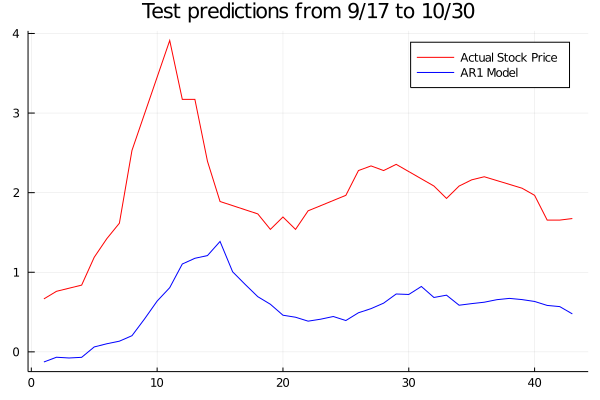

Selected: Quad/Quad, estimated error is: 0.4947559266994087, Validation Error is :0.24739691069530675

9×5 Array{Float64,2}:
  0.0341473    0.0703859   0.040339    0.0399668   0.0391014
  0.190628     0.309245    0.403819    0.42423     0.470876
 -0.121483    -0.0474061  -0.0322643  -0.0203771  -0.0124601
 -0.0116598   -0.0547289  -0.047178   -0.0436424  -0.0419982
 -0.00222593  -0.0395128  -0.0299868  -0.0209418  -0.030526
 -0.0759258   -0.0484876  -0.029957   -0.0377716  -0.0146386
 -0.121483    -0.0474061  -0.0322643  -0.0203771  -0.0124601
 -0.0314384   -0.0369608  -0.145819   -0.153167   -0.114416
  0.02264     -0.0467192  -0.232284   -0.25205    -0.215756

In [63]:
w,mse = analysis1(United, sentiment,UnitedMa)
w9 = analysis2(United, sentiment, w, mse, UnitedMa);w9

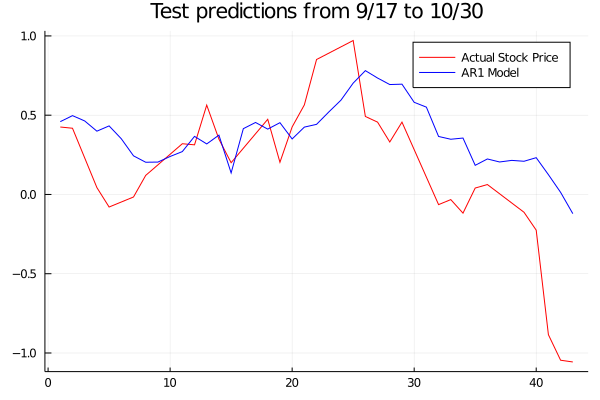

Selected: Quantile/Quad, estimated error is: 0.36178745632625703, Validation Error is :0.39929910599997914

9×5 Array{Float64,2}:
 -0.280379   -0.103086    -0.0346882  -0.0289731   -0.0206183
  0.577139    0.742505     0.692613    0.686944     0.67963
 -0.203333   -0.0495897   -0.0414301  -0.026198    -0.00836695
 -0.1241     -0.0935938   -0.0464634  -0.0438534   -0.0133299
 -0.0511101  -0.00748542  -0.0193115  -0.0110497    0.00624481
 -0.18684    -0.00677688   0.035076    0.00263116  -0.0220848
 -0.203333   -0.0495897   -0.0414301  -0.026198    -0.00836695
  0.240736    0.084853     0.0560329   0.0517484    0.0939161
 -0.166695    0.0226531    0.0323922   0.0166878    0.065942

In [64]:
w,mse = analysis1(Johnson, sentiment,JohnsonMa)
w10 = analysis2(Johnson, sentiment, w, mse, JohnsonMa);w10

In [67]:
w = mean((w1+w2+w3+w4+w5+w6+w7+w8+w9+w10)./10, dims = 2) ;w
sent_train[2:end] stockMa_train[1:end-1] death_train[2:end] vac_train[2:end] shut_train[2:end] spred_train[2:end] death_train[2:end] pos_train[2:end] ones(length(stock_train)-1)

9×1 Array{Float64,2}:
 -0.016866599396181035
  0.7782580553766939
 -0.032844863671539305
 -0.05531863993743773
  0.015015459076809326
 -0.021391227411144555
 -0.032844863671539305
  0.04898618445411961
 -0.009022149444920472

In [68]:
[mean(w1,dims = 2) mean(w2,dims = 2) mean(w3,dims = 2) mean(w4,dims = 2) mean(w5,dims = 2) mean(w6,dims = 2) mean(w7,dims = 2) mean(w8,dims = 2) mean(w9,dims = 2) mean(w10,dims = 2)]

9×10 Array{Float64,2}:
  0.0554874    0.0        -0.0135769    0.0        …   0.0447881  -0.093549
  0.735817     0.835043    0.890889     0.802386       0.359759    0.675766
 -0.116962    -0.0657035  -0.00469132  -0.0187085     -0.0467981  -0.0657835
 -0.130694    -0.0686723  -0.0577972   -0.0953611     -0.0398415  -0.0642681
  0.0369955    0.0585686   0.00353461   0.0209598     -0.0246386  -0.0165424
 -0.0363894   -0.0114688  -0.00207822  -0.0631676  …  -0.0413561  -0.0355988
 -0.116962    -0.0657035  -0.00469132  -0.0187085     -0.0467981  -0.0657835
  0.132535     0.0374728   0.0753837    0.0701918     -0.0963603   0.105457
  0.00873187   0.0         0.0          0.0           -0.144834   -0.00580402

In [ ]:

function findlambda(stock, fig, split, label1)
    i=5
    stock_train = stock[1][1:split[i]]
    sent_train = sentiment[1][1:split[i]]
    death_train = sentiment[3][1:split[i]]
    vac_train = sentiment[2][1:split[i]]
    shut_train = sentiment[4][1:split[i]]
    spred_train = sentiment[5][1:split[i]]
    death_train = sentiment[6][1:split[i]]
    pos_train = sentiment[7][1:split[i]]
    MA_Anthem_train = MA_Anthem[1:split[i]-4]

    stock_test = stock[1][split[i]+1:split[i+1]]
    sent_test = sentiment[1][split[i]+1:split[i+1]]
    death_test = sentiment[3][split[i]+1:split[i+1]]
    vac_test = sentiment[2][split[i]+1:split[i+1]]
    shut_test = sentiment[4][split[i]+1:split[i+1]]
    spred_test = sentiment[5][split[i]+1:split[i+1]]
    death_test = sentiment[6][split[i]+1:split[i+1]]
    pos_test = sentiment[7][split[i]+1:split[i+1]]
    MA_Anthem_test = MA_Anthem[split[i]-4:split[i+1]-4]

    Xtrain = [sent_train[5:end] MA_Anthem_train death_train[5:end] vac_train[5:end] shut_train[5:end] spred_train[5:end] death_train[5:end] pos_train[5:end] ones(length(sent_train[5:end]))]
    Xtest = [sent_test[5:end] MA_Anthem_test[6:end] death_test[5:end] vac_test[5:end] shut_test[5:end] spred_test[5:end] death_test[5:end] pos_test[5:end] ones(length(sent_test[5:end]))]
    Ytrain = stock_train[5:end]
    Ytest = stock_test[5:end]
    #ridge regression
    abs_er = []
    for i in [0.1:0.1:0.9;]
        n = length(Ytrain)
        loss = 1/n*QuadLoss()

        # we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
        λ = i
        reg = λ*QuadReg()

        w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)

        pred = Xtest*w_cur

        date = [5:44]
        #Ytest = Ytest.*std1 .+ mean1
        #pred = pred.*std1 .+ mean1
        #plot(date, Ytest, color = :red,  label = "Actual Stock Price")
        #plot!(date, pred, color = :blue, label = "AR1 Model")
        abs_er = vcat(abs_er, abs_err(Ytest,pred))
    end
    plot!([0.1:0.1:0.9;], abs_er, label = label1)
end

In [ ]:
fig = plot(linestyle = :dot, title = "Change of Absolute Error as Lambda Changes(Ridge)", xlabel = "lambda", ylabel = "mean absolute error")
findlambda(Anthem, fig, split, "Anthem")
findlambda(Cardinal, fig, split, "Cardinal")
findlambda(Cigna, fig, split, "Cigna")
findlambda(CVS, fig, split, "CVS")
findlambda(Gilead, fig, split, "Gilead")
findlambda(McKesson, fig, split, "McKesson")
findlambda(Moderna, fig, split, "Moderna")
findlambda(Pfizer, fig, split, "Pfizer")
findlambda(United, fig, split, "United")
findlambda(Johnson, fig, split, "Johnson")

In [ ]:
function findlambda1(stock, fig, split, label1)
    i=5
    stock_train = stock[1][1:split[i]]
    sent_train = sentiment[1][1:split[i]]
    death_train = sentiment[3][1:split[i]]
    vac_train = sentiment[2][1:split[i]]
    shut_train = sentiment[4][1:split[i]]
    spred_train = sentiment[5][1:split[i]]
    death_train = sentiment[6][1:split[i]]
    pos_train = sentiment[7][1:split[i]]
    MA_Anthem_train = MA_Anthem[1:split[i]-4]

    stock_test = stock[1][split[i]+1:split[i+1]]
    sent_test = sentiment[1][split[i]+1:split[i+1]]
    death_test = sentiment[3][split[i]+1:split[i+1]]
    vac_test = sentiment[2][split[i]+1:split[i+1]]
    shut_test = sentiment[4][split[i]+1:split[i+1]]
    spred_test = sentiment[5][split[i]+1:split[i+1]]
    death_test = sentiment[6][split[i]+1:split[i+1]]
    pos_test = sentiment[7][split[i]+1:split[i+1]]
    MA_Anthem_test = MA_Anthem[split[i]-4:split[i+1]-4]

    Xtrain = [sent_train[5:end] MA_Anthem_train death_train[5:end] vac_train[5:end] shut_train[5:end] spred_train[5:end] death_train[5:end] pos_train[5:end] ones(length(sent_train[5:end]))]
    Xtest = [sent_test[5:end] MA_Anthem_test[6:end] death_test[5:end] vac_test[5:end] shut_test[5:end] spred_test[5:end] death_test[5:end] pos_test[5:end] ones(length(sent_test[5:end]))]
    Ytrain = stock_train[5:end]
    Ytest = stock_test[5:end]
    #ridge regression
    abs_er = []
    for i in [0.1:0.1:0.9;]
        n = length(Ytrain)
        loss = 1/n*QuadLoss()

        # we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
        λ = i
        reg = λ*OneReg()

        w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)

        pred = Xtest*w_cur

        date = [5:44]
        #Ytest = Ytest.*std1 .+ mean1
        #pred = pred.*std1 .+ mean1
        #plot(date, Ytest, color = :red,  label = "Actual Stock Price")
        #plot!(date, pred, color = :blue, label = "AR1 Model")
        abs_er = vcat(abs_er, abs_err(Ytest,pred))
    end
    plot!([0.1:0.1:0.9;], abs_er, label = label1)
end

In [ ]:
fig = plot(linestyle = :dot, title = "Change of Absolute Error as Lambda Changes(Lasso)",xlabel = "lambda", ylabel = "mean absolute error")
findlambda1(Anthem, fig, split, "Anthem")
findlambda1(Cardinal, fig, split, "Cardinal")
findlambda1(Cigna, fig, split, "Cigna")
findlambda1(CVS, fig, split, "CVS")
findlambda1(Gilead, fig, split, "Gilead")
findlambda1(McKesson, fig, split, "McKesson")
findlambda1(Moderna, fig, split, "Moderna")
findlambda1(Pfizer, fig, split, "Pfizer")
findlambda(United, fig, split, "United")
findlambda(Johnson, fig, split, "Johnson")

In [ ]:
n = length(Ytrain)
loss = 1/n*L1Loss()

# we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
λ = .1
reg = λ*QuadReg()

w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)

pred = Xtest*w_cur

date = [5:44]
plot(date, Ytest, color = :red,  label = "Actual Stock Price")
plot!(date, pred, color = :blue, label = "AR1 Model")

In [ ]:
abs_err(Ytest,pred)

In [ ]:
w_cur

In [ ]:
n = length(Ytrain)
loss = 1/n* QuantileLoss(0.3)

# we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
λ = .1
reg = λ*QuadReg()

w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)

pred = Xtest*w_cur

date = [5:44]
plot(date, Ytest, color = :red,  label = "Actual Stock Price")
plot!(date, pred, color = :blue, label = "AR1 Model")

In [ ]:
w_cur

In [ ]:
num_round = 20
bst = xgboost(Xtrain, num_round, label = Ytrain, eta = 1, max_depth = 10000)

In [ ]:
pred = XGBoost.predict(bst, Xtest);

In [ ]:
plot(date, Ytest, color = :red,  label = "Actual Stock Price")
plot!(date, pred, color = :blue, label = "AR1 Model")

In [ ]:
abs_err(Ytest,pred)

In [ ]:
analysis(Cardinal, sentiment)

In [ ]:
analysis(Cigna, sentiment)

In [ ]:
analysis(CVS, sentiment)

In [ ]:
analysis(Johnson, sentiment)

In [ ]:
analysis(Gilead, sentiment)

In [ ]:
analysis(McKesson, sentiment)

In [ ]:
analysis(Moderna, sentiment)

In [ ]:
analysis(Pfizer, sentiment)

In [ ]:
analysis(United, sentiment)